In [1]:
import pandas as pd
from itables import init_notebook_mode
import seaborn as sns
import matplotlib.pyplot as plt
init_notebook_mode(all_interactive=True)

<IPython.core.display.Javascript object>

In [2]:
results_file = '/data/CM_HC_TB000173a_20230605_analysis/work/af/c69a228c26c9a591b13b441d9b07f9/CM_HC_TB000173a_20230605_results.xlsx'

In [3]:
results_df = pd.read_excel(results_file, sheet_name='Results by Condition')
read_counts_df = pd.read_excel(results_file, sheet_name='Read counts')
qc_summary_df = pd.read_excel(results_file, sheet_name='QC Summary')

# Keeping only columns that contain the word 'Complete'
partial_beacon_df = results_df[[col for col in results_df.columns if 'Target' in col or 'Total Beacon %' in col or 'Partial Beacon Total' in col or 'WT Total' in col or 'AttL Total' in col or 'AttR Total' in col]].round(2)
partial_beacon_df.columns = [i.split('_')[0] for i in partial_beacon_df.columns]
complete_beacon_df = results_df[[col for col in results_df.columns if 'Target' in col or 'Complete Beacon %' in col or 'Complete Beacon Total' in col or 'WT Total' in col or 'AttL Total' in col or 'AttR Total' in col]].round(2)
complete_beacon_df.columns = [i.split('_')[0] for i in complete_beacon_df.columns]
beacon_fidelity_df = results_df[[col for col in results_df.columns if 'Target' in col or 'Fidelity' in col or 'Partial Beacon Total' in col or 'Complete Beacon Total' in col]].round(2)
beacon_fidelity_df.columns = [i.split('_')[0] for i in beacon_fidelity_df.columns]
PGI_df = results_df[[col for col in results_df.columns if 'Target' in col or 'PGI %' in col]].round(2)
PGI_df.columns = [i.split('_')[0] for i in PGI_df.columns]
conversion_df = results_df[[col for col in results_df.columns if 'Target' in col or 'Conversion %' in col]].round(2)
conversion_df.columns = [i.split('_')[0] for i in conversion_df.columns]

## <h1><center>Read Statistics</center></h1>

In [4]:
display(qc_summary_df)

Unnamed: 0  25L-550-rep1  25L-550-rep2  25L-550-rep3  \
0       before filter reads  1.170300e+06  1.170476e+06     1618676.0   
1       before filter bases  3.522603e+08  3.523133e+08   487221476.0   
2   before filter q20 bases  2.928729e+08  2.950590e+08   409304320.0   
3   before filter q30 bases  2.704913e+08  2.730804e+08   378848977.0   
4        after filter reads  6.453420e+05  6.451300e+05      895270.0   
5        after filter bases  1.621811e+08  1.615458e+08   225719973.0   
6    after filter q20 bases  1.540611e+08  1.537305e+08   214733729.0   
7    after filter q30 bases  1.459406e+08  1.457963e+08   203483407.0   
8            reads filtered  5.249580e+05  5.253460e+05      723406.0   
9            bases filtered  1.900792e+08  1.907675e+08   261501503.0   
10         reads near probe  4.015020e+05  4.003530e+05      591757.0   
11       reads near probe %  6.222000e+01  6.206000e+01          66.1   

    25R-550-rep1  25R-550-rep2  25R-550-rep3   4L-550-rep1   4L-550-rep2  \
0   1.725754e+06  2.024560e+06  1.740012e+06  4.959300e+06  3.229562e+06   
1   5.194520e+08  6.093926e+08  5.237436e+08  1.492749e+09  9.720982e+08   
2   4.349289e+08  5.140877e+08  4.379912e+08  1.070053e+09  7.739114e+08   
3   4.017267e+08  4.764018e+08  4.059479e+08  9.811452e+08  7.178160e+08   
4   9.534020e+05  1.119642e+06  9.546760e+05  2.415237e+06  1.736776e+06   
5   2.376266e+08  2.822533e+08  2.380649e+08  4.062416e+08  3.723652e+08   
6   2.257473e+08  2.687980e+08  2.273407e+08  3.897545e+08  3.558451e+08   
7   2.136848e+08  2.549955e+08  2.160642e+08  3.744851e+08  3.391257e+08   
8   7.723520e+05  9.049180e+05  7.853360e+05  2.544063e+06  1.492786e+06   
9   2.818254e+08  3.271393e+08  2.856787e+08  1.086508e+09  5.997329e+08   
10  6.037180e+05  6.910190e+05  6.231080e+05  3.690130e+05  9.163850e+05   
11  6.332000e+01  6.172000e+01  6.527000e+01  1.528000e+01  5.276000e+01   

     4L-550-rep3   4R-550-rep1   4R-550-rep2  4R-550-rep3  
0   5.076276e+06  2.125832e+06  3.105478e+06    1241314.0  
1   1.527959e+09  6.398754e+08  9.347489e+08  373635514.0  
2   1.128840e+09  5.025387e+08  7.323279e+08  295187732.0  
3   1.041824e+09  4.647497e+08  6.746900e+08  273071153.0  
4   2.592888e+06  1.126050e+06  1.664853e+06     666094.0  
5   4.481576e+08  2.326470e+08  3.529270e+08  141763098.0  
6   4.319394e+08  2.231122e+08  3.370702e+08  135732581.0  
7   4.155460e+08  2.133592e+08  3.210016e+08  129489677.0  
8   2.483388e+06  9.997820e+05  1.440625e+06     575220.0  
9   1.079801e+09  4.072284e+08  5.818219e+08  231872416.0  
10  5.665780e+05  6.261820e+05  9.041970e+05     400318.0  
11  2.185000e+01  5.561000e+01  5.431000e+01         60.1

In [5]:
display(read_counts_df)

id  25L-550-rep1 read_count  25L-550-rep2 read_count  \
0    AA1520                      861                      882   
1     AA876                      944                      861   
2    AA1542                     1106                     1108   
3    AA1544                      903                      893   
4     AA825                      434                      485   
..      ...                      ...                      ...   
465  CAS968                      988                      958   
466  CAS969                      986                      937   
467  CAS978                      812                      795   
468  CAS985                      898                      946   
469  CAS996                      937                      935   

     25L-550-rep3 read_count  25R-550-rep1 read_count  \
0                       1297                     1286   
1                       1340                     1916   
2                       1532                     1270   
3                       1347                      923   
4                        635                      677   
..                       ...                      ...   
465                     1437                     1631   
466                     1383                     1308   
467                     1201                     1344   
468                     1447                     1196   
469                     1363                     1328   

     25R-550-rep2 read_count  25R-550-rep3 read_count  4L-550-rep1 read_count  \
0                       1393                     1222                     693   
1                       1981                     1798                     968   
2                       1350                     1208                     941   
3                       1112                      909                     859   
4                        826                      719                     387   
..                       ...                      ...                     ...   
465                     2042                     1755                     913   
466                     1453                     1305                     820   
467                     1666                     1517                     904   
468                     1289                     1152                     906   
469                     1492                     1421                     861   

     4L-550-rep2 read_count  4L-550-rep3 read_count  4R-550-rep1 read_count  \
0                      1830                    1114                    1291   
1                      2219                    1396                    1851   
2                      2406                    1539                    1268   
3                      2066                    1212                     860   
4                      1078                     714                     827   
..                      ...                     ...                     ...   
465                    2156                    1296                    1757   
466                    2165                    1267                    1419   
467                    2132                    1387                    1516   
468                    2352                    1492                    1214   
469                    2049                    1238                    1678   

     4R-550-rep2 read_count  4R-550-rep3 read_count  
0                      1825                     790  
1                      2698                    1206  
2                      1835                     843  
3                      1266                     499  
4                      1171                     504  
..                      ...                     ...  
465                    2563                    1157  
466                    2153                     985  
467                    2146                     980  
468                    1726                     800  
469                    2407

## <h1><center>Total Beacon Placement</center></h1>

Target  control AttL Total  control AttR Total  \
0  AA1520                   4                   0   
1   AA876                   0                   0   
2  AA1542                   0                   0   
3  AA1544                   0                   0   
4   AA825                   0                   0   

   control Partial Beacon Total  control WT Total  control Total Beacon %  \
0                          3478                 0                   100.0   
1                          4363               746                    85.4   
2                             0              3172                     0.0   
3                             0              2502                     0.0   
4                             0                 0                     0.0   

   treated AttL Total  treated AttR Total  treated Partial Beacon Total  \
0                1156                 679                          2364   
1                   2                   2                          5168   
2                   0                   0                             0   
3                   0                   0                             0   
4                   0                   0                             0   

   treated WT Total  treated Total Beacon %  
0                 0                  100.00  
1               646                   88.89  
2              3286                    0.00  
3              2766                    0.00  
4                 0                    0.00

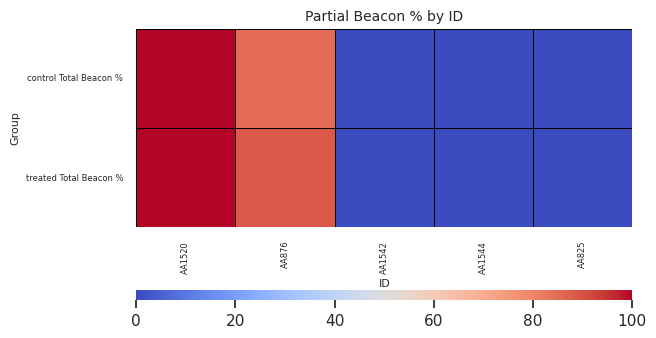

In [6]:
partial_beacon_df = partial_beacon_df[~partial_beacon_df.Target.str.contains('CAS')]

display(partial_beacon_df)

partial_beacon_df = partial_beacon_df[[col for col in partial_beacon_df.columns if '%' in col or 'Target' in col]]

# Set the context for the plot
sns.set(context='notebook', style='whitegrid')

# Transpose the dataframe to have targets on columns and beacon percentages on rows
partial_beacon_df_T = partial_beacon_df.set_index('Target').T

# Create the heatmap
heatmap = sns.heatmap(partial_beacon_df_T, cmap="coolwarm", square=True, robust=True,
                      cbar_kws={"orientation": "horizontal", "pad": 0.17, "aspect": 50},
                      linewidths=0.7, linecolor='black',
                      annot=False)

# Add labels and a title with smaller font sizes
plt.title('Partial Beacon % by ID', fontsize=10)  # Smaller title font
plt.xlabel('ID', fontsize=8)           # Smaller x-axis label font
plt.ylabel('Group', fontsize=8)       # Smaller y-axis label font

plt.xticks(rotation=90, fontsize=6)    # Smaller x-axis tick font
plt.yticks(fontsize=6)                 # Smaller y-axis tick font

# Display the plot
plt.show()


## <h1><center>Complete Beacon Placement</center></h1>

Target  control AttL Total  control AttR Total  \
0  AA1520                   4                   0   
1   AA876                   0                   0   
2  AA1542                   0                   0   
3  AA1544                   0                   0   
4   AA825                   0                   0   

   control Complete Beacon Total  control WT Total  control Complete Beacon %  \
0                           2634                 0                     100.00   
1                           3312               746                      81.62   
2                              0              3172                       0.00   
3                              0              2502                       0.00   
4                              0                 0                       0.00   

   treated AttL Total  treated AttR Total  treated Complete Beacon Total  \
0                1156                 679                           1307   
1                   2                   2                           3864   
2                   0                   0                              0   
3                   0                   0                              0   
4                   0                   0                              0   

   treated WT Total  treated Complete Beacon %  
0                 0                     100.00  
1               646                      85.68  
2              3286                       0.00  
3              2766                       0.00  
4                 0                       0.00

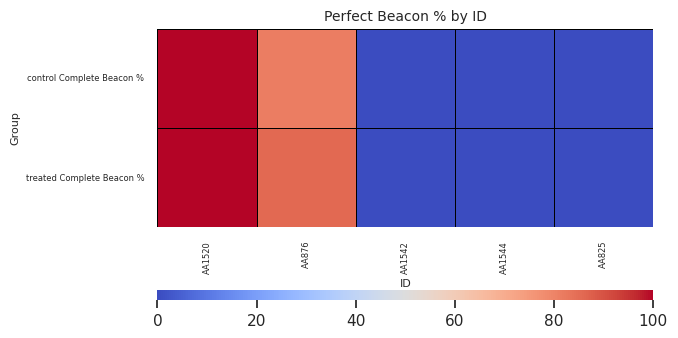

In [7]:
complete_beacon_df = complete_beacon_df[~complete_beacon_df.Target.str.contains('CAS')]

display(complete_beacon_df)

complete_beacon_df = complete_beacon_df[[col for col in complete_beacon_df.columns if '%' in col or 'Target' in col]]


# Set the context for the plot
sns.set(context='notebook', style='whitegrid')

# Transpose the dataframe to have targets on columns and beacon percentages on rows
complete_beacon_df_T = complete_beacon_df.set_index('Target').T

# Create the heatmap
heatmap = sns.heatmap(complete_beacon_df_T, cmap="coolwarm", square=True, robust=True,
                      cbar_kws={"orientation": "horizontal", "pad": 0.17, "aspect": 50},
                      linewidths=0.7, linecolor='black',
                      annot=False)

# Add labels and a title with smaller font sizes
plt.title('Perfect Beacon % by ID', fontsize=10)  # Smaller title font
plt.xlabel('ID', fontsize=8)           # Smaller x-axis label font
plt.ylabel('Group', fontsize=8)       # Smaller y-axis label font

plt.xticks(rotation=90, fontsize=6)    # Smaller x-axis tick font
plt.yticks(fontsize=6)                 # Smaller y-axis tick font

# Display the plot
plt.show()

## <h1><center>Beacon Fidelity</center></h1>

Target  control Partial Beacon Total  control Complete Beacon Total  \
0  AA1520                          3478                           2634   
1   AA876                          4363                           3312   
2  AA1542                             0                              0   
3  AA1544                             0                              0   
4   AA825                             0                              0   

   control Beacon Fidelity %  treated Partial Beacon Total  \
0                     100.00                          2364   
1                      95.57                          5168   
2                       0.00                             0   
3                       0.00                             0   
4                       0.00                             0   

   treated Complete Beacon Total  treated Beacon Fidelity %  
0                           1307                     100.00  
1                           3864                      96.39  
2                              0                       0.00  
3                              0                       0.00  
4                              0                       0.00

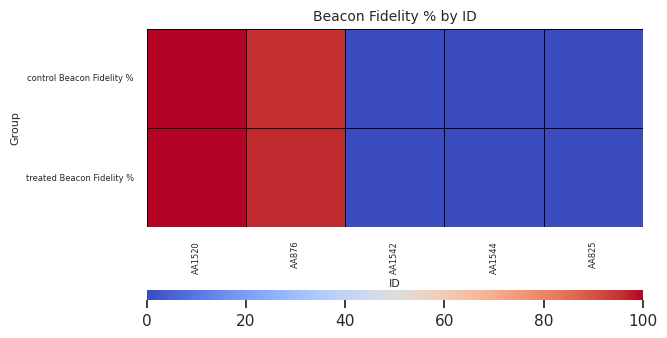

In [8]:

beacon_fidelity_df = beacon_fidelity_df[~beacon_fidelity_df.Target.str.contains('CAS')]

display(beacon_fidelity_df)

beacon_fidelity_df = beacon_fidelity_df[[col for col in beacon_fidelity_df.columns if '%' in col or 'Target' in col]]

# Set the context for the plot
sns.set(context='notebook', style='whitegrid')

# Transpose the dataframe to have targets on columns and beacon percentages on rows
beacon_fidelity_df_T = beacon_fidelity_df.set_index('Target').T

# Create the heatmap
heatmap = sns.heatmap(beacon_fidelity_df_T, cmap="coolwarm", square=True, robust=True,
                      cbar_kws={"orientation": "horizontal", "pad": 0.17, "aspect": 50},
                      linewidths=0.7, linecolor='black',
                      annot=False)

# Add labels and a title with smaller font sizes
plt.title('Beacon Fidelity % by ID', fontsize=10)  # Smaller title font
plt.xlabel('ID', fontsize=8)           # Smaller x-axis label font
plt.ylabel('Group', fontsize=8)       # Smaller y-axis label font

plt.xticks(rotation=90, fontsize=6)    # Smaller x-axis tick font
plt.yticks(fontsize=6)                 # Smaller y-axis tick font


# Display the plot
plt.show()


## <h1><center>PGI</center></h1>

Target  control PGI %  treated PGI %
0    AA1520           0.15          46.93
1     AA876           0.00           0.04
2    AA1542           0.00           0.00
3    AA1544           0.00           0.00
4     AA825           0.00           0.00
..      ...            ...            ...
465  CAS968           0.00           0.00
466  CAS969           0.00           0.00
467  CAS978           0.00           0.03
468  CAS985           0.00           0.10
469  CAS996           0.00           0.00

[470 rows x 3 columns]

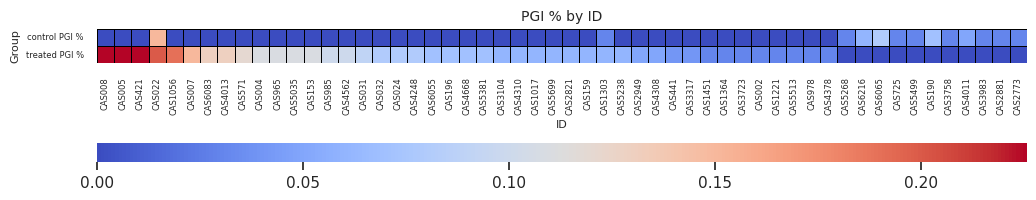

In [9]:

display(PGI_df)

PGI_df = PGI_df.sort_values(by='treated PGI %',ascending=False)

PGI_df = PGI_df[[col for col in PGI_df.columns if '%' in col or 'Target' in col]]

# Set the context for the plot
sns.set(context='notebook', style='whitegrid')

plt.figure(figsize=(12, 8))  # Adjust the width as needed/

PGI_df = PGI_df[~PGI_df.Target.str.contains('AA')]

PGI_df = PGI_df[(PGI_df['treated PGI %'] > 0) | (PGI_df['control PGI %'] > 0)]

# Transpose the dataframe to have targets on columns and beacon percentages on rows
PGI_df_T = PGI_df.set_index('Target').T

# Create the heatmap
heatmap = sns.heatmap(PGI_df_T, cmap="coolwarm", square=True, robust=True,
                      cbar_kws={"orientation": "horizontal", "pad": 0.13, "aspect": 50},
                      linewidths=0.7, linecolor='black',
                      annot=False)

# Add labels and a title with smaller font sizes
plt.title('PGI % by ID', fontsize=10)  # Smaller title font
plt.xlabel('ID', fontsize=8)           # Smaller x-axis label font
plt.ylabel('Group', fontsize=8)       # Smaller y-axis label font

plt.xticks(rotation=90, fontsize=6)    # Smaller x-axis tick font
plt.yticks(fontsize=6)                 # Smaller y-axis tick font

# Display the plot
plt.show()



## <h1><center>Conversion</center></h1>

Target  control Conversion %  treated Conversion %
0    AA1520                  0.15                 46.93
1     AA876                  0.00                  0.05
2    AA1542                  0.00                  0.00
3    AA1544                  0.00                  0.00
4     AA825                  0.00                  0.00
..      ...                   ...                   ...
465  CAS968                  0.00                  0.00
466  CAS969                  0.00                  0.00
467  CAS978                  0.00                  0.03
468  CAS985                  0.00                  0.10
469  CAS996                  0.00                  0.00

[470 rows x 3 columns]

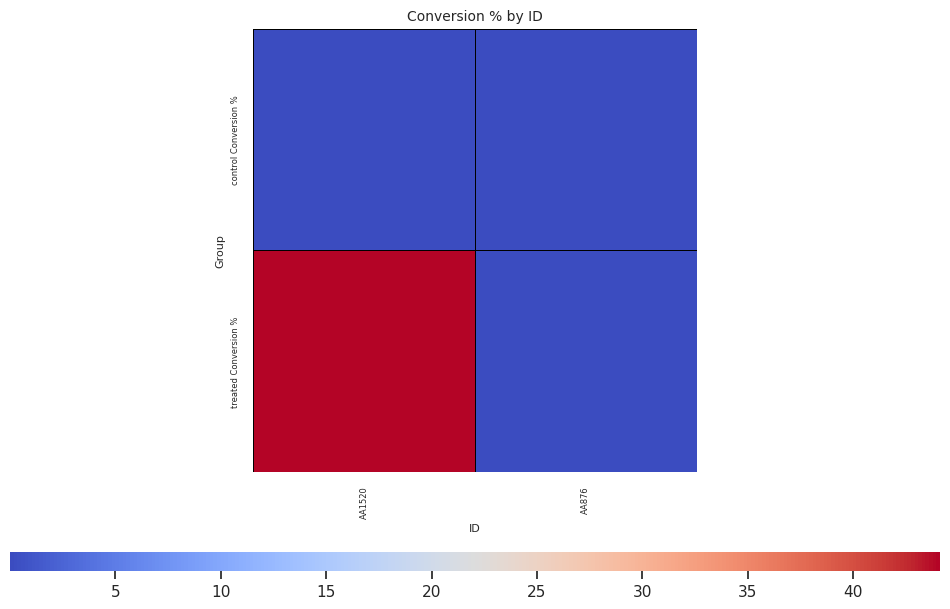

In [10]:

display(conversion_df)

conversion_df = conversion_df.sort_values(by='treated Conversion %',ascending=False)

conversion_df = conversion_df[[col for col in conversion_df.columns if '%' in col or 'Target' in col]]


conversion_df = conversion_df[~conversion_df.Target.str.contains('CAS')]

conversion_df = conversion_df[(conversion_df['treated Conversion %'] > 0) | (conversion_df['control Conversion %'] > 0)]


# Set the context for the plot
sns.set(context='notebook', style='whitegrid')

# Transpose the dataframe to have targets on columns and beacon percentages on rows
conversion_df_T = conversion_df.set_index('Target').T

# Create the heatmap
plt.figure(figsize=(12, 8))  # You can adjust the size to fit your needs
# Create the heatmap
heatmap = sns.heatmap(conversion_df_T, cmap="coolwarm", square=True, robust=True,
                      cbar_kws={"orientation": "horizontal", "pad": 0.13, "aspect": 50},
                      linewidths=0.7, linecolor='black',
                      annot=False)

# Add labels and a title with smaller font sizes
plt.title('Conversion % by ID', fontsize=10)  # Smaller title font
plt.xlabel('ID', fontsize=8)           # Smaller x-axis label font
plt.ylabel('Group', fontsize=8)       # Smaller y-axis label font

plt.xticks(rotation=90, fontsize=6)    # Smaller x-axis tick font
plt.yticks(fontsize=6)                 # Smaller y-axis tick font

# Display the plot
plt.show()

